# Tutorial for Cancer-Biomarkers-from-Clinical-Data

# 1. Data loading and preprocessing

## 1.1. Import the necessary modules

In [1]:
# Library imports
import numpy as np
import pandas as pd

# Add the path to the src folder
import sys
sys.path.append('src')

# Import project functions
from data_preprocessing import load_data, feature_label_split
from random_forest_model import rf_normal_cancers, plot_important_biomarkers
from desc_stats import descriptive_statistics, cancer_biomarkers_uniquely_high, cancer_biomarkers_higher_side_filtering
from stats_tests import find_shared_nature_of_biomarkers

## 1.2. Load the data

In [2]:
categories, dfs = load_data('data/clinical_cancer_data.xlsx')

list(enumerate(categories))

[(0, 'Breast'),
 (1, 'Colorectum'),
 (2, 'Esophagus'),
 (3, 'Liver'),
 (4, 'Lung'),
 (5, 'Normal'),
 (6, 'Ovary'),
 (7, 'Pancreas'),
 (8, 'Stomach')]

In [3]:
biomarkers = feature_label_split(dfs[0])[0].columns
list(enumerate(biomarkers))

[(0, 'AFP '),
 (1, 'Angiopoietin-2 '),
 (2, 'AXL '),
 (3, 'CA-125 '),
 (4, 'CA 15-3 '),
 (5, 'CA19-9 '),
 (6, 'CD44 '),
 (7, 'CEA '),
 (8, 'CYFRA 21-1 '),
 (9, 'DKK1 '),
 (10, 'Endoglin '),
 (11, 'FGF2 '),
 (12, 'Follistatin '),
 (13, 'Galectin-3 '),
 (14, 'G-CSF '),
 (15, 'GDF15 '),
 (16, 'HE4 '),
 (17, 'HGF '),
 (18, 'IL-6 '),
 (19, 'IL-8 '),
 (20, 'Kallikrein-6 '),
 (21, 'Leptin '),
 (22, 'Mesothelin '),
 (23, 'Midkine '),
 (24, 'Myeloperoxidase '),
 (25, 'NSE '),
 (26, 'OPG '),
 (27, 'OPN '),
 (28, 'PAR '),
 (29, 'Prolactin '),
 (30, 'sEGFR '),
 (31, 'sFas '),
 (32, 'SHBG '),
 (33, 'sHER2/sEGFR2/sErbB2 '),
 (34, 'sPECAM-1 '),
 (35, 'TGFa '),
 (36, 'Thrombospondin-2 '),
 (37, 'TIMP-1 '),
 (38, 'TIMP-2 ')]

# 2. Analysis of `Ovary`, `Pancreas` and `Liver` samples, taken together with random subsamples of `Normal` samples

In this section, we will see three cancer types for which the list of biomarkers given by random forest classifier contain biomarkers with uniquely high level in the particular cancer type, along with other biomarkers whose Q3 values are in the top 2 among all cancer types. Essentially, in each of these cancer types, we obtain practically viable biomarkers. 

## 2.1. Analysis of `Normal + Ovary` samples

### 2.1.1. Random forest classification for `Normal + Ovary` samples

In [4]:
important_biomarkers_normal_ovary = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs, 
                                                      cancer1_category_index = 6, 
                                                      iterations = 100,
                                                      threshold = 0.04)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.04:
     Biomarker  Importance
3      CA-125     0.159995
29  Prolactin     0.109398
18       IL-6     0.099734
35       TGFa     0.094122
31       sFas     0.075817
16        HE4     0.048810
37     TIMP-1     0.046099


And here's the list of the biomarker indices.

In [5]:
ovary_important_biomarker_indices_in_RF = list(important_biomarkers_normal_ovary.index)
ovary_important_biomarker_indices_in_RF

[3, 29, 18, 35, 31, 16, 37]

### 2.1.2. Filtering through descriptive statistics of biomarkers in `Normal + Ovary` samples

Now, we find that CA-125 is present in uniquely high levels in `Ovary` samples.

In [6]:
ovary_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories, 
                                                                 dfs = dfs, 
                                                                 cancer_important_biomarker_indices_in_RF = ovary_important_biomarker_indices_in_RF)


Biomarker 3: CA-125 
Outlier categories with uniquely high Q2 levels: [('Ovary', 155.36)]
Outlier categories with uniquely high Q3 levels: [('Ovary', 486.2925)]


Let's see the biomarkers that pass through the uniquely high level criterion.

In [7]:
[biomarkers[i] for i in ovary_biomarkers_uniquely_high]

['CA-125 ']

And, `Prolactin` and `HE4` pass through the higher side filtering criteria.

In [8]:
ovary_candidates_for_higher_side_filtering = ovary_important_biomarker_indices_in_RF.copy()
ovary_candidates_for_higher_side_filtering.remove(ovary_biomarkers_uniquely_high[0])

ovary_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 6,
                                                                       cancer_candidates_for_higher_side_filtering = ovary_candidates_for_higher_side_filtering)


Biomarker 29: Prolactin 
The biomarker's Q3 level is the highest in the given category.

Biomarker 16: HE4 
The biomarker's Q3 level is the highest in the given category.


Here's the list of biomarkers that pass through the higher side filtering criteria.

In [9]:
[biomarkers[i] for i in ovary_biomarkers_higher_side]

['Prolactin ', 'HE4 ']

Let's collect the biomarker indices that pass through the two descriptive statistics-based filtering criteria.


In [10]:
ovary_selected_biomarkers = ovary_biomarkers_uniquely_high + ovary_biomarkers_higher_side

[biomarkers[i] for i in ovary_selected_biomarkers]

['CA-125 ', 'Prolactin ', 'HE4 ']

For example, let's see an overview of `CA-125` levels in all the cancer types, as well as the normal samples.

In [11]:
# descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 3)

### 2.1.3. Yuen-Welch's test of `CA-125`, `Prolactin` and `HE4` levels in `Ovary` samples versus all the other cancer types

In [12]:
ovary_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 6,
    cancer_selected_biomarkers = ovary_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 3: CA-125 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Pancreas,Stomach
Ovary,0.001462,0.001462,0.001475,0.001599,0.001514,0.001424,0.001808,0.001532



Biomarker 29: Prolactin 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Pancreas,Stomach
Ovary,0.000008,0.000057,0.000002,0.006204,0.040432,1.234060e-07,0.000003,0.000002



Biomarker 16: HE4  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Pancreas,Stomach
Ovary,0.005556,0.010388,0.01596,0.007312,0.005633,0.005347,0.053539,0.005956


Now, we have the finalized list of biomarkers. Note that, `HE4` didn't pass the hypothesis test based criterion.

In [13]:
[(biomarkers[i], shared) for i, shared in ovary_shared_nature_of_biomarkers]

[('CA-125 ', []), ('Prolactin ', []), ('HE4 ', ['Pancreas'])]

## 2.2. Analysis of `Normal + Pancreas` samples

### 2.2.1. Random forest classification for `Normal + Pancreas` samples

In [14]:
important_biomarkers_normal_pancreas = rf_normal_cancers(categories = categories, 
                                                         dfs = dfs, 
                                                         cancer1_category_index = 7, 
                                                         iterations = 100, 
                                                         threshold = 0.04)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9389

Biomarkers with Importance >= 0.04:
               Biomarker  Importance
5                CA19-9     0.142069
19                 IL-8     0.094102
18                 IL-6     0.080587
33  sHER2/sEGFR2/sErbB2     0.077110
27                  OPN     0.060258
15                GDF15     0.057668
23              Midkine     0.050770
17                  HGF     0.043427


In [15]:
pancreas_important_biomarker_indices_in_RF = list(important_biomarkers_normal_pancreas.index)
pancreas_important_biomarker_indices_in_RF

[5, 19, 18, 33, 27, 15, 23, 17]

### 2.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Pancreas` samples

In [16]:
pancreas_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                    dfs = dfs,
                                                                    cancer_important_biomarker_indices_in_RF = pancreas_important_biomarker_indices_in_RF)


Biomarker 5: CA19-9 
Outlier categories with uniquely high Q2 levels: [('Pancreas', 101.63)]
Outlier categories with uniquely high Q3 levels: [('Pancreas', 316.3)]


In [17]:
pancreas_biomarkers_uniquely_high

[5]

In [18]:
candidates_for_higher_side_filtering = pancreas_important_biomarker_indices_in_RF.copy()
candidates_for_higher_side_filtering.remove(pancreas_biomarkers_uniquely_high[0])

pancreas_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                          dfs = dfs,
                                                                          cancer_category_index = 7,
                                                                          cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)


Biomarker 19: IL-8 
The biomarker's Q3 level is the third highest in the given category.

Biomarker 33: sHER2/sEGFR2/sErbB2 
The biomarker's Q3 level is the highest in the given category.

Biomarker 15: GDF15 
The biomarker's Q3 level is the highest in the given category.

Biomarker 23: Midkine 
The biomarker's Q3 level is the highest in the given category.


In [19]:
pancreas_biomarkers_higher_side

[19, 33, 15, 23]

In [20]:
pancreas_selected_biomarkers = pancreas_biomarkers_uniquely_high + pancreas_biomarkers_higher_side

[biomarkers[i] for i in pancreas_selected_biomarkers]

['CA19-9 ', 'IL-8 ', 'sHER2/sEGFR2/sErbB2 ', 'GDF15 ', 'Midkine ']

In [21]:
# descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 5)

### 2.2.3. Yuen-Welch's test of `CA19-9` and `SHER2/sEGFR2/sErbB2` levels in `Pancreas` samples versus all the other cancer types

In [22]:
pancreas_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 7,
    cancer_selected_biomarkers = pancreas_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 5: CA19-9 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,0.000004,0.000004,0.000006,0.000007,0.000004,0.000004,0.000028,0.000007



Biomarker 19: IL-8  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,5.671292e-07,0.003083,0.269314,0.755308,0.000024,1.093982e-08,0.000134,0.200486



Biomarker 33: sHER2/sEGFR2/sErbB2 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,2.378440e-14,5.674212e-15,1.794949e-18,1.036979e-14,2.269839e-16,2.257614e-13,4.954688e-17,4.144131e-19



Biomarker 15: GDF15  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,2.316641e-11,0.000017,0.027547,0.404266,2.712515e-08,8.209094e-13,0.000408,0.0029



Biomarker 23: Midkine 


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Stomach
Pancreas,7.642643e-10,0.000037,1.586982e-08,2.867214e-07,0.011287,2.713590e-10,0.000648,4.018868e-08


`IL-8` is immediately dropped. Because the p_values are greater than 0.05 for 3 comparisons.

In [23]:
[(biomarkers[i], shared) for i, shared in pancreas_shared_nature_of_biomarkers]

[('CA19-9 ', []),
 ('sHER2/sEGFR2/sErbB2 ', []),
 ('GDF15 ', ['Liver']),
 ('Midkine ', [])]

## 2.3. Analysis of `Normal + Liver` samples

### 2.3.1. Random forest classification for `Normal + Liver` samples

In [24]:
important_biomarkers_normal_liver = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs,
                                                      cancer1_category_index = 3,
                                                      iterations = 100,
                                                      threshold = 0.04)

Random forest classification: Normal + Liver

Average Accuracy over 100 iterations: 0.9483

Biomarkers with Importance >= 0.04:
           Biomarker  Importance
19             IL-8     0.128577
17              HGF     0.122702
27              OPN     0.117051
15            GDF15     0.085102
24  Myeloperoxidase     0.062697
0               AFP     0.054613
18             IL-6     0.042997


In [25]:
liver_important_biomarker_indices_in_RF = list(important_biomarkers_normal_liver.index)
liver_important_biomarker_indices_in_RF

[19, 17, 27, 15, 24, 0, 18]

### 2.3.2. Filtering through descriptive statistics of biomarkers in `Normal + Liver` samples

In [26]:
liver_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                 dfs = dfs,
                                                                 cancer_important_biomarker_indices_in_RF = liver_important_biomarker_indices_in_RF)


Biomarker 0: AFP 
Outlier categories with uniquely high Q2 levels: [('Liver', 9437.215)]
Outlier categories with uniquely high Q3 levels: [('Liver', 592839.507)]


In [ ]:
candidates_for_higher_side_filtering = liver_important_biomarker_indices_in_RF.copy()
candidates_for_higher_side_filtering.remove(liver_biomarkers_uniquely_high[0])

liver_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 3,
                                                                       cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)


Biomarker 17: HGF 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 27: OPN 
The biomarker's Q3 level is the highest in the given category.

Biomarker 15: GDF15 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 24: Myeloperoxidase 
The biomarker's Q3 level is the highest in the given category.

Biomarker 18: IL-6 
The biomarker's Q3 level is the third highest in the given category.


In [28]:
liver_selected_biomarkers = liver_biomarkers_uniquely_high + liver_biomarkers_higher_side

[biomarkers[i] for i in liver_selected_biomarkers]

['AFP ', 'HGF ', 'OPN ', 'GDF15 ', 'Myeloperoxidase ', 'IL-6 ']

In [29]:
# descriptive_statistics(categories = categories, dfs = dfs, biomarker_index = 0)

### 2.3.3 Yuen-Welch's test of `AFP`, `OPN`, `Myeloperoxidase`, `HGF` and `GDF15` levels in `Liver` samples versus all the other cancer types

In [30]:
liver_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 3,
    cancer_selected_biomarkers = liver_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 0: AFP 


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.001791,0.001781,0.001816,0.001784,0.001773,0.001802,0.001904,0.001825



Biomarker 17: HGF  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.000034,0.000232,0.449572,0.000018,0.000009,0.000151,0.00141,0.669668



Biomarker 27: OPN  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,1.681269e-07,0.000036,0.126098,4.412999e-07,1.271855e-09,0.00003,0.000247,0.064973



Biomarker 15: GDF15  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,4.226823e-07,0.003002,0.217993,0.000041,5.117955e-08,0.015416,0.404266,0.05992



Biomarker 24: Myeloperoxidase  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.000203,0.000519,0.378072,0.00007,0.000049,0.000367,0.000153,0.280572



Biomarker 18: IL-6  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Lung,Normal,Ovary,Pancreas,Stomach
Liver,0.009712,0.057377,0.18638,0.378734,0.002443,0.087843,0.113844,0.099127


Note that `GDF15` and `IL-6` are dropped.

In [31]:
liver_shared_nature_of_biomarkers

[(0, []),
 (17, ['Esophagus', 'Stomach']),
 (27, ['Esophagus', 'Stomach']),
 (24, ['Esophagus', 'Stomach'])]

## 2.4. RandomForest accuracy scores for classifying liver, ovarian, and pancreatic cancers from normal ones  

### 2.4.1. Normal + Liver with `AFP`, `OPN`, `Myeloperoxidase` and `HGF`

In [32]:
liver_finalized_biomarkers = [i for i, _ in liver_shared_nature_of_biomarkers]
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 3,
                  selected_biomarkers = np.array(liver_finalized_biomarkers),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.01)

Random forest classification: Normal + Liver

Average Accuracy over 100 iterations: 0.9094

Biomarkers with Importance >= 0.01:
          Biomarker  Importance
1              HGF     0.367832
2              OPN     0.353739
3  Myeloperoxidase     0.141180
0              AFP     0.137250


,Biomarker,Importance
1,HGF,0.367832
2,OPN,0.353739
3,Myeloperoxidase,0.141180
0,AFP,0.137250


### 2.4.2. Normal + Ovary with `CA-125`, `Prolactin` and `HE4`

In [33]:
ovary_finalized_biomarkers = [i for i, _ in ovary_shared_nature_of_biomarkers]
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 6,
                  selected_biomarkers = np.array(ovary_finalized_biomarkers),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.01)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9664

Biomarkers with Importance >= 0.01:
    Biomarker  Importance
0     CA-125     0.403243
1  Prolactin     0.344532
2        HE4     0.252224


,Biomarker,Importance
0,CA-125,0.403243
1,Prolactin,0.344532
2,HE4,0.252224


### 2.4.3. Normal + Pancreas with `CA19-9`, `sHER2/sEGFR2/sErbB2`, `Midkine` and `GDF15`

In [34]:
pancreas_finalized_biomarkers = [i for i, _ in pancreas_shared_nature_of_biomarkers]
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 7,
                  selected_biomarkers = np.array(pancreas_finalized_biomarkers),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9097

Biomarkers with Importance >= 0.05:
              Biomarker  Importance
0               CA19-9     0.439539
1  sHER2/sEGFR2/sErbB2     0.229176
2                GDF15     0.179118
3              Midkine     0.152168


,Biomarker,Importance
0,CA19-9,0.439539
1,sHER2/sEGFR2/sErbB2,0.229176
2,GDF15,0.179118
3,Midkine,0.152168


### 2.4.4. Normal + Liver + Ovary + Pancreas

In [35]:
liver_ovary_pancreas_finalized_biomarkers = liver_finalized_biomarkers + ovary_finalized_biomarkers + pancreas_finalized_biomarkers
rf_normal_cancers(categories = categories, 
                  dfs = dfs,
                  cancer1_category_index = 3,
                  cancer2_category_index = 6,
                  cancer3_category_index = 7,
                  selected_biomarkers = np.array(liver_ovary_pancreas_finalized_biomarkers),
                  test_size = 0.2,
                  iterations = 100,
                  threshold = 0.05)

Random forest classification: Normal + Liver + Ovary + Pancreas

Average Accuracy over 100 iterations: 0.8453

Biomarkers with Importance >= 0.05:
              Biomarker  Importance
4               CA-125     0.150591
8  sHER2/sEGFR2/sErbB2     0.132295
7               CA19-9     0.098512
2                  OPN     0.094762
0                  AFP     0.088595
1                  HGF     0.088304
9                GDF15     0.081338
5            Prolactin     0.080187
3      Myeloperoxidase     0.070480
6                  HE4     0.066309


,Biomarker,Importance
4,CA-125,0.150591
8,sHER2/sEGFR2/sErbB2,0.132295
7,CA19-9,0.098512
2,OPN,0.094762
0,AFP,0.088595
1,HGF,0.088304
9,GDF15,0.081338
5,Prolactin,0.080187
3,Myeloperoxidase,0.070480
6,HE4,0.066309


# 3. Analysis of `Breast` and `Colorectum` samples, taken together with random subsamples of `Normal` samples

Now we see two cancer types for which the important biomarkers given by random forest classifier are not suitable in practical scenario for distinguishing between different cancer types from normal samples. None of the biomarkers display uniquely high level for the particular cancer type, and none can be found with Q3 level in top 2 among all the cancer types. 

## 3.1. Analysis of `Normal + Breast` samples

### 3.1.1. Random forest classification for `Normal + Breast` samples

In [36]:
important_biomarkers_normal_breast = rf_normal_cancers(categories = categories, 
                                                       dfs = dfs,
                                                       cancer1_category_index = 0,
                                                       iterations = 100,
                                                       threshold = 0.04)

Random forest classification: Normal + Breast

Average Accuracy over 100 iterations: 0.9630

Biomarkers with Importance >= 0.04:
      Biomarker  Importance
35        TGFa     0.100919
19        IL-8     0.087020
18        IL-6     0.085325
29   Prolactin     0.055615
8   CYFRA 21-1     0.052147
27         OPN     0.048404
16         HE4     0.046379
30       sEGFR     0.043890


And here's list of biomarkers that were selected by random forest classifier for `Normal + Breast` samples.

In [37]:
breast_important_biomarker_indices_in_RF = list(important_biomarkers_normal_breast.index)
breast_important_biomarker_indices_in_RF

[35, 19, 18, 29, 8, 27, 16, 30]

### 3.1.2. Filtering through descriptive statistics of biomarkers in `Normal + Breast` samples

Now, we see that none of the biomarkers selected by Random Forest is present in uniquely high levels in the `Breast` samples.

In [38]:
breast_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                 dfs = dfs,
                                                                 cancer_important_biomarker_indices_in_RF = breast_important_biomarker_indices_in_RF)

And none satisfy the higher side filtering criterion.

In [39]:
candidates_for_higher_side_filtering = breast_important_biomarker_indices_in_RF.copy()
if len(breast_biomarkers_uniquely_high) != 0:
    candidates_for_higher_side_filtering.remove(breast_biomarkers_uniquely_high[0])

breast_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 0,
                                                                       cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)

So, we've got no biomarker left at the end of the filtering process.

## 3.2. Analysis of `Normal + Colorectum` samples

### 3.2.1. Random forest classification for `Normal + Colorectum` samples

In [40]:
important_biomarkers_normal_colorectum = rf_normal_cancers(categories = categories, 
                                                           dfs = dfs,
                                                           cancer1_category_index = 1,
                                                           iterations = 100,
                                                           threshold = 0.04)

Random forest classification: Normal + Colorectum

Average Accuracy over 100 iterations: 0.9576

Biomarkers with Importance >= 0.04:
     Biomarker  Importance
19       IL-8     0.135958
18       IL-6     0.095141
27        OPN     0.090611
17        HGF     0.061261
15      GDF15     0.058960
31       sFas     0.057872
29  Prolactin     0.054625


In [41]:
colorectum_important_biomarker_indices_in_RF = list(important_biomarkers_normal_colorectum.index)
colorectum_important_biomarker_indices_in_RF

[19, 18, 27, 17, 15, 31, 29]

### 3.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Colorectum` samples

* Uniquely high levels: None
* Higher side filtering: None

Note that, `IL-8` and `IL-6`, being important in regulating immune response and inflammation, are not specific to any one type of cancer. For example, the same two biomarkers are two of the most important ones in separating `Normal` and `Breast` samples, as shown above. And they can be found in higher levels in some other cancer types, such as `Esophagus`, `Liver` and `Lung` samples.

`OPN` Q3 levels are much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`HGF` Q3 levels are higher in `Pancreas` samples, and much higher in `Esophagus`, `Liver`, and `Stomach` samples than in `Colorectum` samples.

`GDF15` Q3 levels are close in `Colorectum` and Ovary samples, and higher in `Esophagus`, `Liver`, `Stomach` and `Pancreas` samples than in `Colorectum` samples.

`sFas` Q3 levels are higher in `Breast`, `Esophagus`, `Liver`, `Lung`, `Pancreas`, `Stomach` and even `Normal` samples than in `Colorectum` samples.

`Prolactin` levels are much higher in `Liver`, `Lung` and `Ovary` samples than in `Colorectum` samples.



In [42]:
colorectum_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                 dfs = dfs,
                                                                 cancer_important_biomarker_indices_in_RF = colorectum_important_biomarker_indices_in_RF)

In [43]:
candidates_for_higher_side_filtering = colorectum_important_biomarker_indices_in_RF.copy()
if len(colorectum_biomarkers_uniquely_high) != 0:
    candidates_for_higher_side_filtering.remove(colorectum_biomarkers_uniquely_high[0])

colorectum_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                            dfs = dfs,
                                                                            cancer_category_index = 1,
                                                                            cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)

# 4. Analysis of `Esophagus`, `Lung` and `Stomach` samples, taken together with random subsamples of `Normal` samples

## 4.1. Analysis of `Normal + Esophagus` samples

### 4.1.1. Random forest classification for `Normal + Esophagus` samples

In [44]:
important_biomarkers_normal_esophagus = rf_normal_cancers(categories = categories, 
                                                          dfs = dfs,
                                                          cancer1_category_index = 2,
                                                          iterations = 100,
                                                          threshold = 0.04)

Random forest classification: Normal + Esophagus

Average Accuracy over 100 iterations: 0.8617

Biomarkers with Importance >= 0.04:
           Biomarker  Importance
27              OPN     0.098270
17              HGF     0.096577
18             IL-6     0.078884
19             IL-8     0.068289
24  Myeloperoxidase     0.060353
15            GDF15     0.060257
37           TIMP-1     0.051771
30            sEGFR     0.040355


In [45]:
esophagus_important_biomarker_indices_in_RF = list(important_biomarkers_normal_esophagus.index)
esophagus_important_biomarker_indices_in_RF

[27, 17, 18, 19, 24, 15, 37, 30]

### 4.1.2.  Filtering through descriptive statistics of biomarkers in `Normal + Esophagus` samples

In [46]:
esophagus_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                 dfs = dfs,
                                                                 cancer_important_biomarker_indices_in_RF = esophagus_important_biomarker_indices_in_RF)

In [47]:
candidates_for_higher_side_filtering = esophagus_important_biomarker_indices_in_RF.copy()
if len(esophagus_biomarkers_uniquely_high) != 0:
    candidates_for_higher_side_filtering.remove(esophagus_biomarkers_uniquely_high[0])

esophagus_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 2,
                                                                       cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)


Biomarker 27: OPN 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 17: HGF 
The biomarker's Q3 level is the third highest in the given category.

Biomarker 18: IL-6 
The biomarker's Q3 level is the highest in the given category.

Biomarker 19: IL-8 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 24: Myeloperoxidase 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 15: GDF15 
The biomarker's Q3 level is the third highest in the given category.

Biomarker 37: TIMP-1 
The biomarker's Q3 level is the highest in the given category.


In [48]:
esophagus_selected_biomarkers = esophagus_biomarkers_uniquely_high + esophagus_biomarkers_higher_side

[biomarkers[i] for i in esophagus_selected_biomarkers]

['OPN ', 'HGF ', 'IL-6 ', 'IL-8 ', 'Myeloperoxidase ', 'GDF15 ', 'TIMP-1 ']

### 4.1.3. Yuen-Welch's test of filtered biomarkers' levels in `Esophagus` samples versus all the other cancer types

In [49]:
esophagus_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 2,
    cancer_selected_biomarkers = esophagus_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 27: OPN  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000004,0.002299,0.126098,0.000015,8.602151e-09,0.002064,0.016719,0.859041



Biomarker 17: HGF  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000012,0.000163,0.449572,0.000005,0.000002,0.000096,0.001961,0.752577



Biomarker 18: IL-6  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000056,0.00053,0.18638,0.012079,0.000011,0.001099,0.001523,0.001212



Biomarker 19: IL-8  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000087,0.004256,0.396322,0.000398,0.000018,0.000807,0.269314,0.82043



Biomarker 24: Myeloperoxidase  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.003723,0.009067,0.378072,0.001306,0.000913,0.006547,0.00283,0.881598



Biomarker 15: GDF15  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000001,0.049825,0.217993,0.000415,7.878640e-08,0.18321,0.027547,0.507677



Biomarker 37: TIMP-1  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Liver,Lung,Normal,Ovary,Pancreas,Stomach
Esophagus,0.000002,0.00021,0.1256,0.000007,9.282458e-07,0.164092,0.165575,0.03306


In [50]:
esophagus_shared_nature_of_biomarkers

[(27, ['Liver', 'Stomach']),
 (17, ['Liver', 'Stomach']),
 (18, ['Liver']),
 (24, ['Liver', 'Stomach'])]

In [51]:
[(biomarkers[i], shared) for i, shared in esophagus_shared_nature_of_biomarkers]

[('OPN ', ['Liver', 'Stomach']),
 ('HGF ', ['Liver', 'Stomach']),
 ('IL-6 ', ['Liver']),
 ('Myeloperoxidase ', ['Liver', 'Stomach'])]

## 4.2. Analysis of `Normal + Lung` samples

### 4.2.1. Random forest classification for `Normal + Lung` samples

In [52]:
important_biomarkers_normal_lung = rf_normal_cancers(categories = categories, 
                                                     dfs = dfs,
                                                     cancer1_category_index = 4,
                                                     iterations = 100,
                                                     threshold = 0.04)

Random forest classification: Normal + Lung

Average Accuracy over 100 iterations: 0.9769

Biomarkers with Importance >= 0.04:
      Biomarker  Importance
29   Prolactin     0.156559
19        IL-8     0.080851
25         NSE     0.079439
18        IL-6     0.074091
15       GDF15     0.052625
27         OPN     0.051229
8   CYFRA 21-1     0.047263


In [53]:
lung_important_biomarker_indices_in_RF = list(important_biomarkers_normal_lung.index)
lung_important_biomarker_indices_in_RF

[29, 19, 25, 18, 15, 27, 8]

### 4.2.2. Filtering through descriptive statistics of biomarkers in `Normal + Lung` samples

In [54]:
lung_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                 dfs = dfs,
                                                                 cancer_important_biomarker_indices_in_RF = lung_important_biomarker_indices_in_RF)

In [55]:
candidates_for_higher_side_filtering = lung_important_biomarker_indices_in_RF.copy()
if len(lung_biomarkers_uniquely_high) != 0:
    candidates_for_higher_side_filtering.remove(lung_biomarkers_uniquely_high[0])

lung_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 4,
                                                                       cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)


Biomarker 29: Prolactin 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 18: IL-6 
The biomarker's Q3 level is the second highest in the given category.

Biomarker 8: CYFRA 21-1 
The biomarker's Q3 level is the highest in the given category.


In [56]:
lung_selected_biomarkers = lung_biomarkers_uniquely_high + lung_biomarkers_higher_side

[biomarkers[i] for i in lung_selected_biomarkers]

['Prolactin ', 'IL-6 ', 'CYFRA 21-1 ']

### 4.2.3. Yuen-Welch's test of filtered biomarkers' levels in `Lung` samples versus all the other cancer types

In [57]:
lung_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 4,
    cancer_selected_biomarkers = lung_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 29: Prolactin  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Normal,Ovary,Pancreas,Stomach
Lung,6.296918e-08,0.000016,3.830400e-09,0.155303,4.899186e-14,0.040432,1.719043e-08,6.396915e-10



Biomarker 18: IL-6  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Liver,Normal,Ovary,Pancreas,Stomach
Lung,0.000148,0.024907,0.012079,0.378734,5.606116e-07,0.113291,0.168486,0.121762



Biomarker 8: CYFRA 21-1  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Liver,Normal,Ovary,Pancreas,Stomach
Lung,0.003903,0.001833,0.58737,0.553203,5.810759e-07,0.183812,0.066042,0.024372


In [58]:
[(biomarkers[i], shared) for i, shared in lung_shared_nature_of_biomarkers]

[('Prolactin ', ['Liver'])]

## 4.3. Analysis of `Normal + Stomach` samples

### 4.3.1. Random forest classification for `Normal + Stomach` samples

In [59]:
important_biomarkers_normal_stomach = rf_normal_cancers(categories = categories, 
                                                        dfs = dfs,
                                                        cancer1_category_index = 8,
                                                        iterations = 100,
                                                        threshold = 0.04)

Random forest classification: Normal + Stomach

Average Accuracy over 100 iterations: 0.9304

Biomarkers with Importance >= 0.04:
           Biomarker  Importance
27              OPN     0.152077
18             IL-6     0.088584
19             IL-8     0.075116
15            GDF15     0.066546
17              HGF     0.063138
30            sEGFR     0.056581
8        CYFRA 21-1     0.043083
24  Myeloperoxidase     0.042440


In [60]:
stomach_important_biomarker_indices_in_RF = list(important_biomarkers_normal_stomach.index)
stomach_important_biomarker_indices_in_RF

[27, 18, 19, 15, 17, 30, 8, 24]

### 4.3.2. Filtering through descriptive statistics of biomarkers in `Normal + Stomach` samples

In [61]:
stomach_biomarkers_uniquely_high = cancer_biomarkers_uniquely_high(categories = categories,
                                                                 dfs = dfs,
                                                                 cancer_important_biomarker_indices_in_RF = stomach_important_biomarker_indices_in_RF)

In [62]:
candidates_for_higher_side_filtering = stomach_important_biomarker_indices_in_RF.copy()
if len(stomach_biomarkers_uniquely_high) != 0:
    candidates_for_higher_side_filtering.remove(stomach_biomarkers_uniquely_high[0])

stomach_biomarkers_higher_side = cancer_biomarkers_higher_side_filtering(categories = categories,
                                                                       dfs = dfs,
                                                                       cancer_category_index = 8,
                                                                       cancer_candidates_for_higher_side_filtering = candidates_for_higher_side_filtering)


Biomarker 27: OPN 
The biomarker's Q3 level is the third highest in the given category.

Biomarker 19: IL-8 
The biomarker's Q3 level is the highest in the given category.

Biomarker 17: HGF 
The biomarker's Q3 level is the highest in the given category.

Biomarker 24: Myeloperoxidase 
The biomarker's Q3 level is the third highest in the given category.


In [63]:
stomach_selected_biomarkers = stomach_biomarkers_uniquely_high + stomach_biomarkers_higher_side

[biomarkers[i] for i in stomach_selected_biomarkers]

['OPN ', 'IL-8 ', 'HGF ', 'Myeloperoxidase ']

### 4.3.3. Yuen-Welch's test of filtered biomarkers' levels in `Stomach` samples versus all the other cancer types

In [64]:
stomach_shared_nature_of_biomarkers = find_shared_nature_of_biomarkers(
    categories = categories,
    dfs = dfs,
    cancer_category_index = 8,
    cancer_selected_biomarkers = stomach_selected_biomarkers,
    p_threshold = 0.05,
    debug = True
)


Biomarker 27: OPN  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Pancreas
Stomach,2.594188e-09,0.000114,0.859041,0.064973,2.303674e-08,5.892776e-14,0.000211,0.00496



Biomarker 19: IL-8  didn't pass the p-value cutoff for three or more categories. It is dropped.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Pancreas
Stomach,0.000087,0.003815,0.82043,0.297188,0.00039,0.000018,0.000776,0.200486



Biomarker 17: HGF  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Pancreas
Stomach,0.000026,0.000282,0.752577,0.669668,0.000011,0.000004,0.000175,0.002486



Biomarker 24: Myeloperoxidase  didn't pass the p-value cutoff for one or two categories.


,Breast,Colorectum,Esophagus,Liver,Lung,Normal,Ovary,Pancreas
Stomach,0.001553,0.004868,0.881598,0.280572,0.000393,0.000245,0.003247,0.001087


In [65]:
stomach_shared_nature_of_biomarkers

[(27, ['Esophagus', 'Liver']),
 (17, ['Esophagus', 'Liver']),
 (24, ['Esophagus', 'Liver'])]

In [66]:
[biomarkers[i] for i, _ in stomach_shared_nature_of_biomarkers]

['OPN ', 'HGF ', 'Myeloperoxidase ']

# 5. Summary of findings

Now, let's have a look at all the cancer types and their selected biomarkers, with shared nature. We make a few summarizing comments, looking at all the cancer types and their selected biomarkers, with shared nature.

## 5.1. `Ovary` biomarkers 
We make a comment that `HE4` might be shared with `Pancreas`.

In [67]:
[(biomarkers[i],  shared) for i, shared in ovary_shared_nature_of_biomarkers]

[('CA-125 ', []), ('Prolactin ', []), ('HE4 ', ['Pancreas'])]

## 5.2. `Pancreas` biomarkers 
We make a comment that `GDF15` might be shared with `Liver`.

In [68]:
[(biomarkers[i], shared) for i, shared in pancreas_shared_nature_of_biomarkers]

[('CA19-9 ', []),
 ('sHER2/sEGFR2/sErbB2 ', []),
 ('GDF15 ', ['Liver']),
 ('Midkine ', [])]

## 5.3. `Liver` biomarkers
Note that `HGF`, `OPN` and `Myloperoxidase` are hereby confirmed as shared between `Liver`, `Esophagus` and `Stomach`.

In [69]:
[(biomarkers[i], shared) for i, shared in liver_shared_nature_of_biomarkers]

[('AFP ', []),
 ('HGF ', ['Esophagus', 'Stomach']),
 ('OPN ', ['Esophagus', 'Stomach']),
 ('Myeloperoxidase ', ['Esophagus', 'Stomach'])]

## 5.4. `Esophagus` biomarkers
Note the sharing of `OPN`, `HGF` and `Myloperoxidase` with `Liver` and `Stomach`.

In [70]:
[(biomarkers[i], shared) for i, shared in esophagus_shared_nature_of_biomarkers]

[('OPN ', ['Liver', 'Stomach']),
 ('HGF ', ['Liver', 'Stomach']),
 ('IL-6 ', ['Liver']),
 ('Myeloperoxidase ', ['Liver', 'Stomach'])]

## 5.5. `Stomach` biomarkers
Note the sharing of `OPN`, `HGF` and `Myloperoxidase` with `Liver` and `Esophagus`.

In [71]:
[(biomarkers[i], shared) for i, shared in stomach_shared_nature_of_biomarkers]

[('OPN ', ['Esophagus', 'Liver']),
 ('HGF ', ['Esophagus', 'Liver']),
 ('Myeloperoxidase ', ['Esophagus', 'Liver'])]

## 5.6. `Lung` biomarkers
Since `Prolactin` is reported in the higher side filtering of `Ovary` with no shared nature, and it's levels are the highest in `Ovary`, we do not consider it a reliable biomarker for `Lung` cancer.

In [72]:
[(biomarkers[i], shared) for i, shared in lung_shared_nature_of_biomarkers]

[('Prolactin ', ['Liver'])]

## 6. Conclusions

In [81]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

### 6.1. Important Biomarkers Chosen at First Step

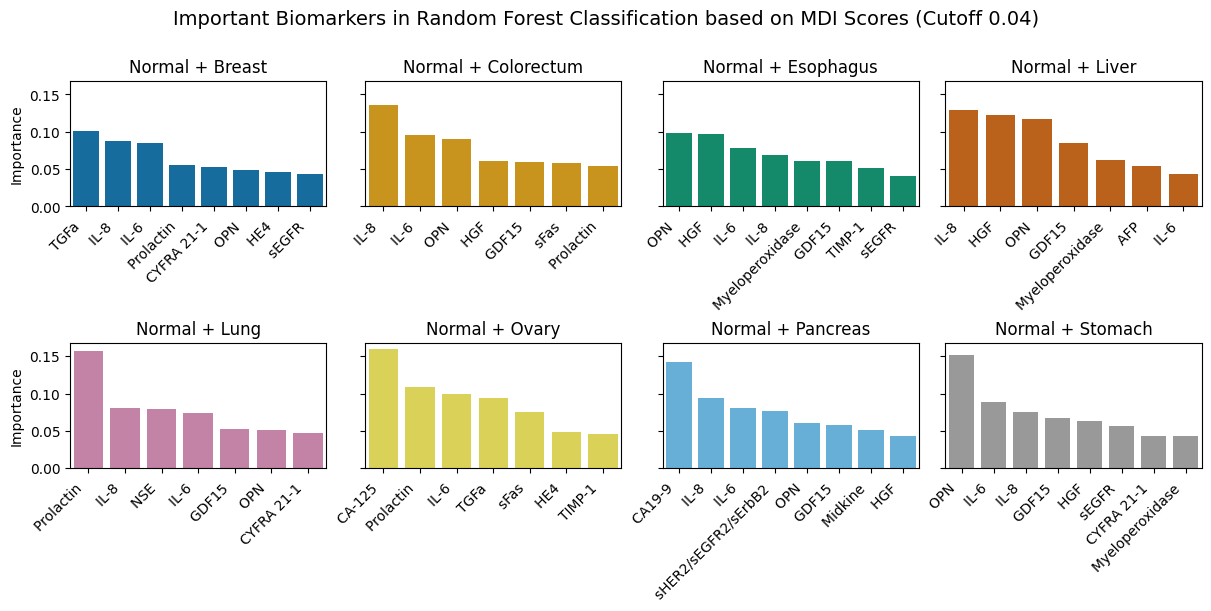

In [74]:
# Color-blind friendly palette
cbf_colors = ['#0072B2', '#E69F00', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9', '#999999']
importance_scores = [important_biomarkers_normal_breast, important_biomarkers_normal_colorectum, important_biomarkers_normal_esophagus, important_biomarkers_normal_liver, important_biomarkers_normal_lung, important_biomarkers_normal_ovary, important_biomarkers_normal_pancreas, important_biomarkers_normal_stomach]

fig, axs = plt.subplots(2, 4, figsize=(12, 6), sharey=True, constrained_layout=True)
axs.flatten()
for i, ax in enumerate(axs.flatten()):
    sns.barplot(data=importance_scores[i], x="Biomarker", y="Importance", ax=ax, color=cbf_colors[i])
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('')
    if i<5:
        ax.set_title(f'Normal + {categories[i]}')
    else:
        ax.set_title(f'Normal + {categories[i+1]}')

fig.suptitle(f"Important Biomarkers in Random Forest Classification based on MDI Scores (Cutoff 0.04)\n", fontsize=14)
plt.show()

### 6.2. Descriptive statistics based filtering

#### 6.2.1. Uniquely high levels

Text(0.5, 0.98, 'Q2 and Q3 Levels of the Biomarkers Across Cancer Types\n')

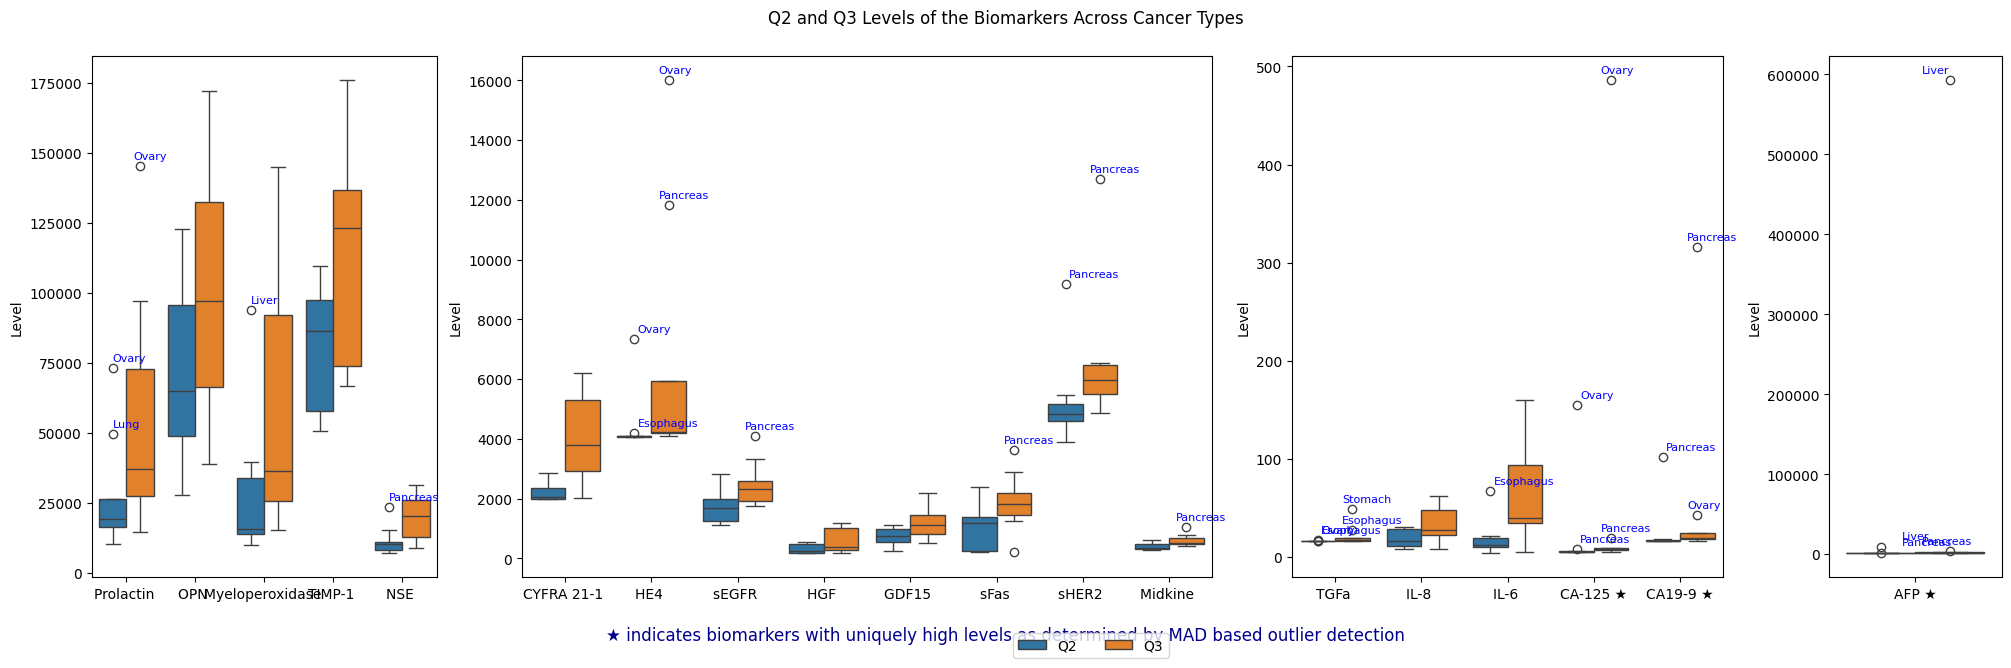

In [112]:
data_rows = []
rf_important_biomarkers = pd.concat(importance_scores, axis=0, ignore_index=True).iloc[:, 0].unique()
for biomarker in rf_important_biomarkers:
    for i, cancer_type in enumerate(categories):
        df = dfs[i]
        desc_stats = df[biomarker].describe()
        mean = desc_stats['mean']
        std = desc_stats['std']
        cv = mean / std
        Q2 = desc_stats['50%']
        Q3 = desc_stats['75%']
        data_row_Q2 = [biomarker, Q2, 'Q2', cancer_type]
        data_row_Q3 = [biomarker, Q3, 'Q3', cancer_type]
        data_rows.append(data_row_Q2)
        data_rows.append(data_row_Q3)
        
columns = ['Biomarker', 'Level', 'Quartile', 'Tumor_type']
cv_boxplot_df = pd.DataFrame(data_rows, columns=columns).replace('sHER2/sEGFR2/sErbB2 ', 'sHER2 ').replace('CA-125 ', 'CA-125 ★').replace('CA19-9 ', 'CA19-9 ★').replace('AFP ', 'AFP ★')

# facet_kws = dict(col_wrap=3)
# sns.catplot(data=cv_boxplot_df, x='Quartile', y='Level', hue='Tumor_type', col='Biomarker', aspect=0.5, col_wrap=3)

biomarkers_0_to_200000_range = ['Prolactin ', 'OPN ', 'Myeloperoxidase ', 'NSE ', 'TIMP-1 ']
biomarkers_0_to_10000_range = ['CYFRA 21-1 ', 'HE4 ', 'sEGFR ', 'HGF ', 'GDF15 ', 'sFas ', 'sHER2 ', 'Midkine ']
biomarkers_AFP = ['AFP ★']
biomarker_sets_together = biomarkers_0_to_200000_range + biomarkers_0_to_10000_range + biomarkers_AFP
cv_boxplot_df_1 = cv_boxplot_df[cv_boxplot_df['Biomarker'].isin(biomarkers_0_to_200000_range)]
cv_boxplot_df_2 = cv_boxplot_df[cv_boxplot_df['Biomarker'].isin(biomarkers_0_to_10000_range)]
cv_boxplot_df_3 = cv_boxplot_df[~cv_boxplot_df['Biomarker'].isin(biomarker_sets_together)]
cv_boxplot_df_4 = cv_boxplot_df[cv_boxplot_df['Biomarker'].isin(biomarkers_AFP)]

boxplot_dfs = [cv_boxplot_df_1, cv_boxplot_df_2, cv_boxplot_df_3, cv_boxplot_df_4]

gs_kw = dict(width_ratios=[4, 8, 5, 2], height_ratios=[1])
fig, axs = plt.subplots(1, 4, figsize = (20,6), gridspec_kw=gs_kw, constrained_layout=True)
axs.flatten()

for i, ax in enumerate(axs):
    # sns.stripplot(data=boxplot_dfs[i], x = 'Biomarker', y = 'Level',  hue = 'Quartile', dodge=True, jitter=False, ax=ax)
    sns.boxplot(data=boxplot_dfs[i], x = 'Biomarker', y = 'Level',  hue = 'Quartile', ax=ax)
    ax.set_xlabel('')
    # Add outlier annotations
    for biomarker in boxplot_dfs[i]['Biomarker'].unique():
        biomarker_data = boxplot_dfs[i][boxplot_dfs[i]['Biomarker'] == biomarker]
        
        for quartile in biomarker_data['Quartile'].unique():
            data = biomarker_data[biomarker_data['Quartile'] == quartile]
            levels = data['Level']
            tumor_types = data['Tumor_type']
            
            q1 = levels.quantile(0.25)
            q3 = levels.quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            
            outliers = data[levels > upper_bound]
            for _, outlier_row in outliers.iterrows():
                outlier_level = outlier_row['Level']
                outlier_quartile = outlier_row['Quartile']
                tumor_type = outlier_row['Tumor_type']
                if outlier_quartile == 'Q2':
                    ax.annotate(f"{tumor_type}", 
                                xy=(biomarker, outlier_level), 
                                xytext=(-10, 5), 
                                textcoords="offset points", 
                                fontsize=8, 
                                color='blue')
                else:
                    ax.annotate(f"{tumor_type}", 
                                xy=(biomarker, outlier_level), 
                                xytext=(5, 5), 
                                textcoords="offset points", 
                                fontsize=8, 
                                color='blue')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', ncol=2, fontsize=10, bbox_to_anchor=(0.5, -0.1))
# Completely remove legends from all subplots
for ax in axs:
    ax.get_legend().remove()  
    
# Add explanatory text at the bottom to indicate what "★" means
fig.text(0.5, -0.05, '★ indicates biomarkers with uniquely high levels as determined by MAD based outlier detection', 
         ha='center', va='center', fontsize=12, color='darkblue')

fig.suptitle("Q2 and Q3 Levels of the Biomarkers Across Cancer Types\n")

In [109]:
plt.close()

Text(0.5, 0.98, 'Q2 and Q3 Levels of the Biomarkers Across Cancer Types\n')

<Figure size 1200x800 with 0 Axes>

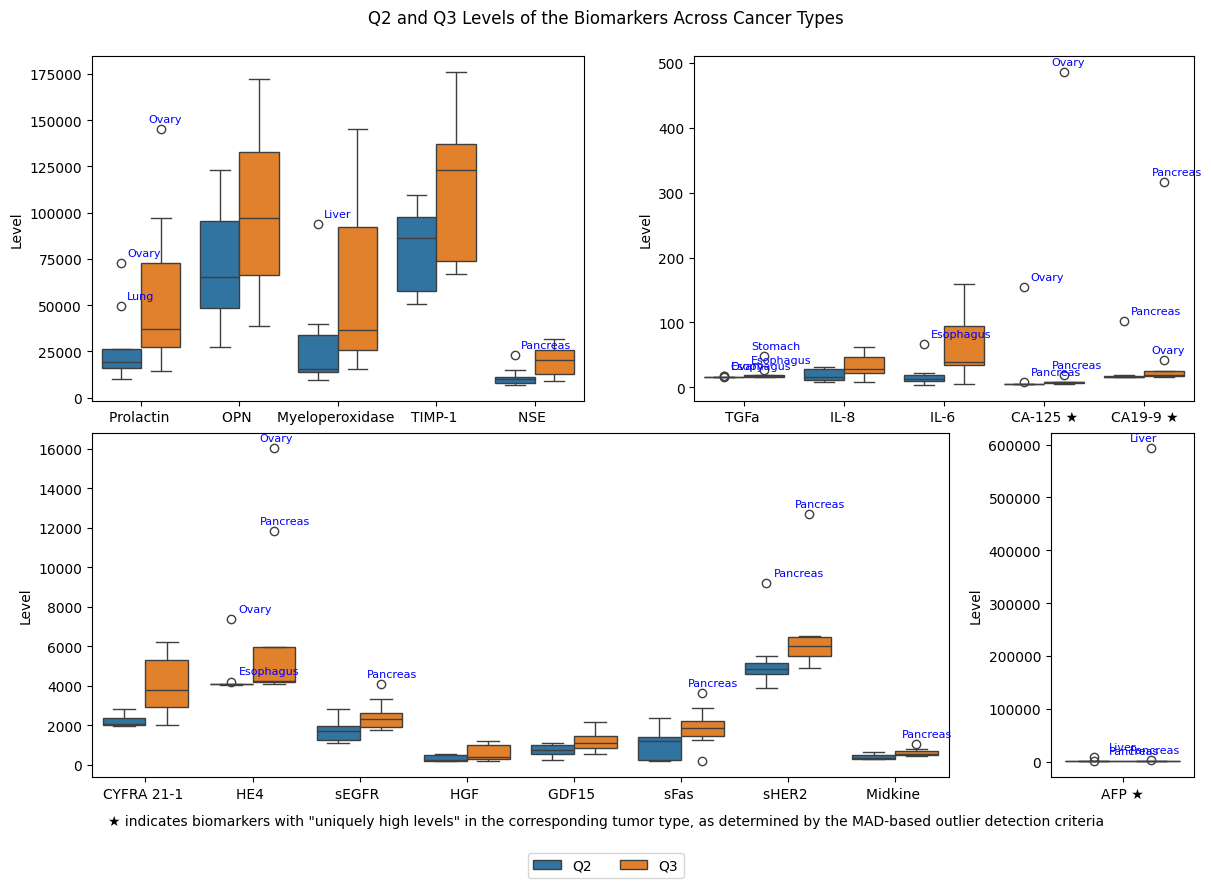

In [129]:
boxplot_dfs = [cv_boxplot_df_1, cv_boxplot_df_3, cv_boxplot_df_2, cv_boxplot_df_4]

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 10, figure=fig)

# Create figure with flexible layout
fig = plt.figure(figsize=(12, 8), constrained_layout = True)
gs = GridSpec(2, 10, figure=fig)

# Define subplots (6:4 width ratio for the first row, 8:2 width ratio for the second row)
ax1 = fig.add_subplot(gs[0, :5])  # First row, first subplot (occupying 6 columns)
ax2 = fig.add_subplot(gs[0, 5:])  # First row, second subplot (occupying 4 columns)
ax3 = fig.add_subplot(gs[1, :8])  # Second row, first subplot (occupying 8 columns)
ax4 = fig.add_subplot(gs[1, 8:])  # Second row, second subplot (occupying 2 columns)

axs = [ax1, ax2, ax3, ax4]

for i, ax in enumerate(axs):
    # sns.stripplot(data=boxplot_dfs[i], x = 'Biomarker', y = 'Level',  hue = 'Quartile', dodge=True, jitter=False, ax=ax)
    sns.boxplot(data=boxplot_dfs[i], x = 'Biomarker', y = 'Level',  hue = 'Quartile', ax=ax)
    ax.set_xlabel('')
    # Add outlier annotations
    for biomarker in boxplot_dfs[i]['Biomarker'].unique():
        biomarker_data = boxplot_dfs[i][boxplot_dfs[i]['Biomarker'] == biomarker]
        
        for quartile in biomarker_data['Quartile'].unique():
            data = biomarker_data[biomarker_data['Quartile'] == quartile]
            levels = data['Level']
            tumor_types = data['Tumor_type']
            
            q1 = levels.quantile(0.25)
            q3 = levels.quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            
            outliers = data[levels > upper_bound]
            for _, outlier_row in outliers.iterrows():
                outlier_level = outlier_row['Level']
                outlier_quartile = outlier_row['Quartile']
                tumor_type = outlier_row['Tumor_type']
                if outlier_quartile == 'Q2':
                    ax.annotate(f"{tumor_type}", 
                                xy=(biomarker, outlier_level), 
                                xytext=(-10, 5), 
                                textcoords="offset points", 
                                fontsize=8, 
                                color='blue')
                else:
                    ax.annotate(f"{tumor_type}", 
                                xy=(biomarker, outlier_level), 
                                xytext=(5, 5), 
                                textcoords="offset points", 
                                fontsize=8, 
                                color='blue')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize=10, bbox_to_anchor=(0.5, -0.1))
# Completely remove legends from all subplots
for ax in axs:
    ax.get_legend().remove()  
    
# Add explanatory text at the bottom to indicate what "★" means
fig.text(0.5, -0.02, '★ indicates biomarkers with \"uniquely high levels\" in the corresponding tumor type, as determined by the MAD-based outlier detection criteria', ha='center', va='center', fontsize=10, color='black')
fig.suptitle("Q2 and Q3 Levels of the Biomarkers Across Cancer Types\n")

#### 6.2.2. Higher side filtering

#### 6.2.3. Yuen-Welch's test